In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Now we have to load the tensors of training and test sets

In [4]:
# Load the dataset from the .npz file
npz_file_path = "/content/drive/MyDrive/npz file (tensors)/chest_xray_split_dataset.npz"
data = np.load(npz_file_path)

# Extract train and test datasets and labels
train_data = data['train_dataset']
train_label = data['train_labels']
test_data = data['test_dataset']
test_label = data['test_labels']

# Verify the shapes of the loaded data
print(f"Train dataset shape: {train_data.shape}")
print(f"Train labels shape: {train_label.shape}")
print(f"Test dataset shape: {test_data.shape}")
print(f"Test labels shape: {test_label.shape}")

Train dataset shape: (1832, 224, 224)
Train labels shape: (1832,)
Test dataset shape: (460, 224, 224)
Test labels shape: (460,)


we have to make a input shape something like this (1832, 224, 224, 1) 1 indicate the values are in grey scale

In [5]:
# Expand the dimensions of the data to add the channel dimension (grayscale -> (224, 224, 1))
train_data = train_data[..., tf.newaxis]  # Adding the channel dimension (1 for grayscale)
test_data = test_data[..., tf.newaxis]    # Adding the channel dimension (1 for grayscale)

# Verify the new shape
print(f"Train dataset shape: {train_data.shape}")
print(f"Test dataset shape: {test_data.shape}")

Train dataset shape: (1832, 224, 224, 1)
Test dataset shape: (460, 224, 224, 1)


In [6]:
train_data = tf.constant(train_data)
train_label = tf.constant(train_label)
test_data = tf.constant(test_data)
test_label = tf.constant(test_label)

We do all the preprocessing in preprocess notebook now we start building a model

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Sequential

1st we build small model with less number of layers and slowly improving it...

In [8]:
model_1 = Sequential([
    Input(shape=(224, 224, 1)),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(4, activation='softmax')
])

In [9]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 394272)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │       1,577,092 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,577,412 (6.02 MB)

 Trainable params: 1,577,412 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compile the model
model_1.compile (optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [11]:
# Fit the model
history = model_1.fit(train_data,
                      train_label,
                      epochs=10,
                      batch_size=32,
                      validation_data=(test_data, test_label))

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.4750 - loss: 5.1777 - val_accuracy: 0.7848 - val_loss: 0.4947
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8119 - loss: 0.4242 - val_accuracy: 0.8674 - val_loss: 0.3063
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9295 - loss: 0.2162 - val_accuracy: 0.8978 - val_loss: 0.2832
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9476 - loss: 0.1698 - val_accuracy: 0.9130 - val_loss: 0.2171
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9706 - loss: 0.1143 - val_accuracy: 0.9413 - val_loss: 0.1583
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9865 - loss: 0.0769 - val_accuracy: 0.9370 - val_loss: 0.1545
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9901 - loss: 0.0629 - val_accuracy: 0.9457 - val_loss: 0.1647
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9834 - loss: 0.0597 - val_accuracy: 0.9478 - 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9455 - loss: 0.1385
Test Loss: 0.13287054002285004
Test Accuracy: 0.9521738886833191
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       115
           1       0.96      0.93      0.95       115
           2       0.96      0.93      0.95       115
           3       0.95      0.99      0.97       115

    accuracy                           0.95       460
   macro avg       0.95      0.95      0.95       460
weighted avg       0.95      0.95      0.95       460



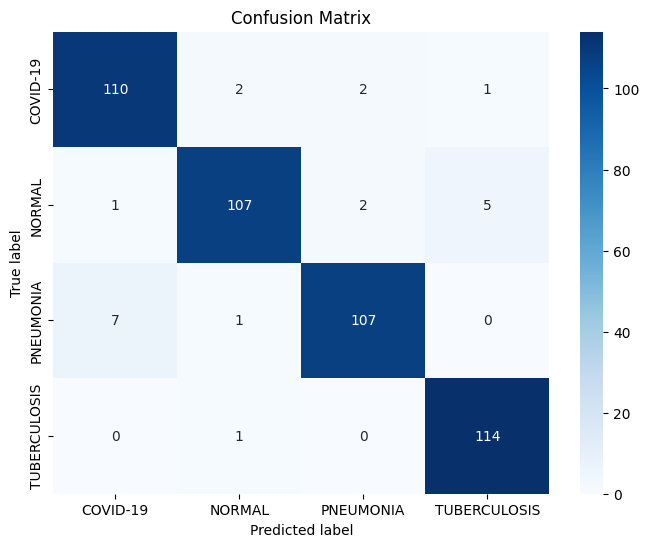

In [12]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_1.evaluate(test_data, test_label)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predictions on the test set
test_predictions = model_1.predict(test_data)
# Convert predictions from probabilities to class labels (take the argmax of the predicted probabilities)
predicted_labels = np.argmax(test_predictions, axis=1)

# Generate classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(test_label, predicted_labels))

# Generate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(test_label, predicted_labels)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['COVID-19', 'NORMAL', 'PNEUMONIA', 'TUBERCULOSIS'], yticklabels=['COVID-19', 'NORMAL', 'PNEUMONIA', 'TUBERCULOSIS'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [13]:
import os

# Specify the folder path
save_path = "/content/drive/MyDrive/lung-disease-detection-model"
os.makedirs(save_path, exist_ok=True)  # Create the folder if it doesn't exist

# Full path for the .keras file
model_save_path = os.path.join(save_path, "lung_disease_detection_model.keras")

# Save the model
model_1.save(model_save_path)

print(f"Model saved successfully at: {model_save_path}")

Model saved successfully at: /content/drive/MyDrive/lung-disease-detection-model/lung_disease_detection_model.keras
